In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determenistic = True

In [1]:
!pwd

/content


In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20293635.06it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 332671.62it/s]
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5815623.21it/s]                           
8192it [00:00, 129190.40it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train = X_train.float()
X_test = X_test.float()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])


In [0]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n, 10)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  
mnist_net = MNISTNet(100)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [0]:
torch.cuda.is_available()

True

In [0]:
!nvidia-smi

Tue Sep 10 14:03:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    32W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -2

In [0]:
batch_size = 100

test_acc_hist = []
test_lost_hist = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]
    x_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    preds = mnist_net.forward(x_batch)
    loss_val = loss(preds, y_batch)
    loss_val.backward()
    optimizer.step()
    

  test_preds = mnist_net.forward(X_test)
  test_lost_hist.append(loss(test_preds, y_test))
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_acc_hist.append(accuracy)
  print(accuracy)

tensor(0.9421, device='cuda:0')
tensor(0.9428, device='cuda:0')
tensor(0.9401, device='cuda:0')
tensor(0.9427, device='cuda:0')
tensor(0.9464, device='cuda:0')
tensor(0.9408, device='cuda:0')
tensor(0.9446, device='cuda:0')
tensor(0.9409, device='cuda:0')
tensor(0.9477, device='cuda:0')
tensor(0.9435, device='cuda:0')
tensor(0.9436, device='cuda:0')
tensor(0.9392, device='cuda:0')
tensor(0.9423, device='cuda:0')
tensor(0.9460, device='cuda:0')
tensor(0.9461, device='cuda:0')
tensor(0.9458, device='cuda:0')
tensor(0.9420, device='cuda:0')
tensor(0.9481, device='cuda:0')
tensor(0.9459, device='cuda:0')
tensor(0.9477, device='cuda:0')
tensor(0.9439, device='cuda:0')
tensor(0.9458, device='cuda:0')
tensor(0.9487, device='cuda:0')
tensor(0.9438, device='cuda:0')
tensor(0.9457, device='cuda:0')
tensor(0.9466, device='cuda:0')
tensor(0.9487, device='cuda:0')
tensor(0.9456, device='cuda:0')
tensor(0.9470, device='cuda:0')
tensor(0.9447, device='cuda:0')
tensor(0.9455, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

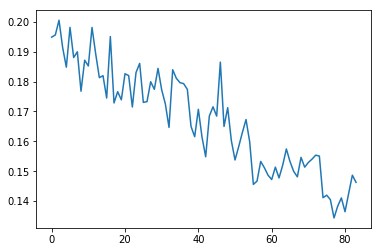

In [0]:
import matplotlib.pyplot as plt
plt.plot(test_lost_hist)